# Classification with Logistic Regression and SVM

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Import all necessary libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

import sklearn.module import Model
model = Model()
model.fit(X,y)
predictions = model.predict(X_new)
print(predictions)

## The Data
Read the train dataset in to a pandas dataframe

In [4]:
input_file = "titanic_train.csv"

# comma delimited is the default
df = pd.read_csv(input_file, header = 0)

# put the original column names in a python list
original_headers = list(df.columns.values)
print(df.head())
print(original_headers)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
['

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#drop the name and ticket when loading the data
df_dropped = df.drop(df.columns[[3,8]],1)
print(df_dropped.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin  \
0            1         0       3    male  22.0      1      0   7.2500   NaN   
1            2         1       1  female  38.0      1      0  71.2833   C85   
2            3         1       3  female  26.0      0      0   7.9250   NaN   
3            4         1       1  female  35.0      1      0  53.1000  C123   
4            5         0       3    male  35.0      0      0   8.0500   NaN   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [7]:
# remove the non-numeric columns
df_numeric = df._get_numeric_data()
print(df_numeric.head())

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


# Exploratory Data Analysis

## Missing Data
Use the heatmap functionality of seaborn to see where we are missing data.

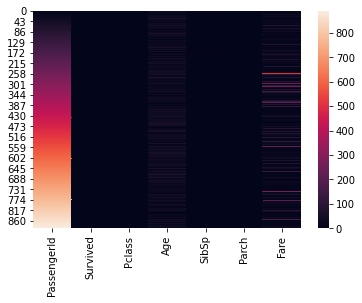

In [8]:
# heatmap using just the numeric data
import seaborn as sns

heatmap = sns.heatmap(df_numeric)

<AxesSubplot:>

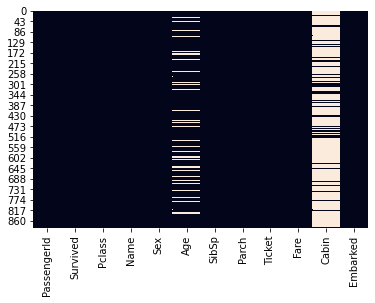

In [9]:
#heatmap using all data
sns.heatmap(df.isnull(), cbar=False)

#### From this heatmap we see that most of the 'cabin' column is filled with missing data, and many of the values in the 'Age' column are missing.
#### This confirms what we saw above using the .info() method above

Create a histogram for the target variable "Survived". You can use the seaborn.countplot function. 

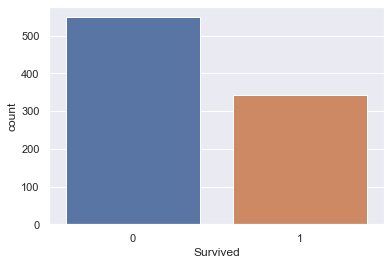

In [10]:
#seaborn.countplot
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Survived", data=df)

#### 0 means they did not survive
#### 1 means they survived

Create a histogram for the target variable "Survived" for males and females. 

In [11]:
df_male = df.drop(df[df['Sex'] == 'female'].index)
print(df_male.head())

   PassengerId  Survived  Pclass                            Name   Sex   Age  \
0            1         0       3         Braund, Mr. Owen Harris  male  22.0   
4            5         0       3        Allen, Mr. William Henry  male  35.0   
5            6         0       3                Moran, Mr. James  male   NaN   
6            7         0       1         McCarthy, Mr. Timothy J  male  54.0   
7            8         0       3  Palsson, Master. Gosta Leonard  male   2.0   

   SibSp  Parch     Ticket     Fare Cabin Embarked  
0      1      0  A/5 21171   7.2500   NaN        S  
4      0      0     373450   8.0500   NaN        S  
5      0      0     330877   8.4583   NaN        Q  
6      0      0      17463  51.8625   E46        S  
7      3      1     349909  21.0750   NaN        S  


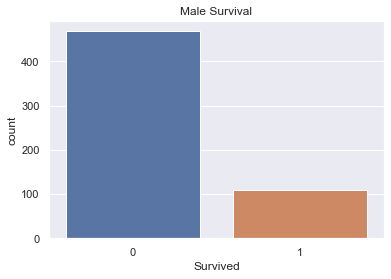

In [12]:
#seaborn.countplot
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Survived", data=df_male).set(title='Male Survival')

In [13]:
df_female = df.drop(df[df['Sex'] == 'male'].index)
print(df_female.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  


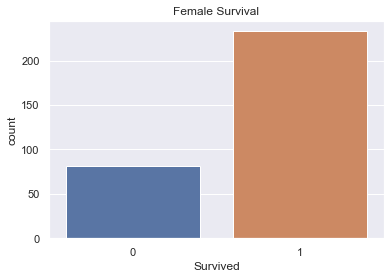

In [14]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Survived", data=df_female).set(title='Female Survival')

Create a histogram for the  "Pclass" feature.

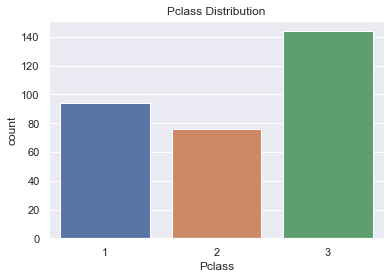

In [15]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Pclass", data=df_female).set(title='Pclass Distribution')

## Data Cleaning
Fill in the missing data points with the average age for the age column. Drop the Cabin columna and all the row that have feature Emkarked that is NaN. 

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
#fill nan age values with the average

mean_value=df['Age'].mean()
print(mean_value)
df['Age'].fillna(value=mean_value, inplace=True)
print(df)

29.69911764705882
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ... 

In [18]:
#Drop the entire Cabin column and all the row that have feature Emkarked that is NaN.
headers = list(df.columns.values)
print(headers)
df = df.drop(df.columns[[10]],1)
headers = list(df.columns.values)
print(headers)


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


In [19]:
#have df only pick up rows that do not contain NAN values in the Embarked column
df = df[df['Embarked'].notna()]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## Converting Categorical Features 

Use pandas.get_dummies() function to convert categorical data

In [20]:

#pandas.get_dummies()
# Dont do get_dummies on Pclass or SibSp
# get_dummies can only be done on categorical data
# normalize that data before training the model
#probably drop name and ticket before training, or dont then do it and see the difference


# SibSp = # of siblings / spouses aboard the Titanic
# Parch = # of parents / children aboard the Titanic
df_dummies = pd.get_dummies(df, columns=['Sex', 'Embarked'])
#df_dummies_two = pd.get_dummies(df_dummies, col)
df_dummies


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,1,1,0,0


In [21]:
df_dummies_dropped = df_dummies.drop(['Name', 'Ticket'], axis=1) #1 is to drop the column
df_dummies_dropped

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [22]:
from sklearn.preprocessing import MinMaxScaler

# copy the data
df_normalized = df_dummies_dropped.copy()

# apply normalization techniques
column = 'Fare'
df_normalized[column] = MinMaxScaler().fit_transform(np.array(df_normalized[column]).reshape(-1,1))

# view normalized data
display(df_normalized)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,0.014151,0,1,0,0,1
1,2,1,1,38.000000,1,0,0.139136,1,0,1,0,0
2,3,1,3,26.000000,0,0,0.015469,1,0,0,0,1
3,4,1,1,35.000000,1,0,0.103644,1,0,0,0,1
4,5,0,3,35.000000,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,0.025374,0,1,0,0,1
887,888,1,1,19.000000,0,0,0.058556,1,0,0,0,1
888,889,0,3,29.699118,1,2,0.045771,1,0,0,0,1
889,890,1,1,26.000000,0,0,0.058556,0,1,1,0,0


In [23]:
# apply normalization techniques
column = 'Age'
df_normalized[column] = MinMaxScaler().fit_transform(np.array(df_normalized[column]).reshape(-1,1))

# view normalized data
display(df_normalized)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0.271174,1,0,0.014151,0,1,0,0,1
1,2,1,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,1,3,0.321438,0,0,0.015469,1,0,0,0,1
3,4,1,1,0.434531,1,0,0.103644,1,0,0,0,1
4,5,0,3,0.434531,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0.334004,0,0,0.025374,0,1,0,0,1
887,888,1,1,0.233476,0,0,0.058556,1,0,0,0,1
888,889,0,3,0.367921,1,2,0.045771,1,0,0,0,1
889,890,1,1,0.321438,0,0,0.058556,0,1,1,0,0


# Logistic Regression Model
## Train Test Split

In [24]:
survived = df_normalized["Survived"]
survived.head

<bound method NDFrame.head of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64>

In [25]:
df_normalized = df_normalized.drop(['Survived'], axis=1)
df_normalized

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,0.271174,1,0,0.014151,0,1,0,0,1
1,2,1,0.472229,1,0,0.139136,1,0,1,0,0
2,3,3,0.321438,0,0,0.015469,1,0,0,0,1
3,4,1,0.434531,1,0,0.103644,1,0,0,0,1
4,5,3,0.434531,0,0,0.015713,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0.334004,0,0,0.025374,0,1,0,0,1
887,888,1,0.233476,0,0,0.058556,1,0,0,0,1
888,889,3,0.367921,1,2,0.045771,1,0,0,0,1
889,890,1,0.321438,0,0,0.058556,0,1,1,0,0


In [26]:
#play around with the %'s here
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y) #this is 30% test data. Random is a seed for random for splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_normalized, survived, test_size=0.3) #this is 30% test data. Random is a seed for random for splitting the data

#model.fit(X_train, y_train) #fit the model
#print(model.score(X_test, y_test)) # get the score of the model
#X_train.info()
#y_test.info()


## Training and Predicting

Train a Logistic Regression model with the training data. 

In [27]:
# do the same procedure on test data as I did training data. ie filling missing data points with the mean and create dummies etc

# Logistic Regression in scikit-learn
#from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)

# predicting probabilities
#y_pred_probs = logreg.predict_proba(X_test)[:,1]
#print(y_pred_probs[0])


C:\Users\john4\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

Compute precision, recall, f1-score. Use the classification report from sklearn.metrics.

In [28]:
print(logreg.score(X_test, y_test)) # get the score of the model

y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8202247191011236
[[136  17]
 [ 31  83]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       153
           1       0.83      0.73      0.78       114

    accuracy                           0.82       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.82      0.82      0.82       267



# Support Vector Machines

## Train a Support Vector Classifier

In [29]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
# Predicting the result and giving the accuracy
score = svc.score(X_test, y_test)

prediction = svc.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[153   0]
 [114   0]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       153
           1       0.00      0.00      0.00       114

    accuracy                           0.57       267
   macro avg       0.29      0.50      0.36       267
weighted avg       0.33      0.57      0.42       267



C:\Users\john4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\john4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\john4\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gridsearch Practice
Apply GridSearch to find the optimal values of C and gamma. Create a GridSearchCV object and fit it to the training data.

In [30]:
from sklearn.model_selection import GridSearchCV
parameters = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001]} #dictionary that contains all of the parameters to try
svc = SVC()
grid = GridSearchCV(svc, parameters)
grid.fit(X_train, y_train)
#sorted(grid.cv_results_.keys())

print(grid.best_params_)


{'C': 1000, 'gamma': 0.0001}


## Evaluation

Evaluate the grid model by computing the precision, recall and f1-score. Use the classification report from sklearn.metrics.

In [31]:

y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.88      0.84       153
           1       0.82      0.71      0.76       114

    accuracy                           0.81       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



## OPEN END QUESTION
Compare the performance of the logistic regression model and SVM in two paragraphs. Which one is performing better? Why? 


The linear regression model performed better, as we can see by evaluating the classification report. SVM works well with unstructured data like images and text, and that was not the type of data that we used. We had a structured database with independent and dependent variables that we were trying to solve for, so the more statistical approach of linear regression works better. We were able to get a more tailored prediction model, because linear regression can move around the data points, where SVM is only a single line. Althouhgh, one of the downsides of using a linear regression model is that we are prone to overfitting the data, where SVM is not prone to overfitting because of the single line mentioned before.
